This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [ ]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = ''

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [3]:
# First, import the relevant modules

import json
import requests

import matplotlib.pyplot as plt
from datetime import datetime

In [108]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

url = https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2017-01-02&end_date=2017-01-02&api_key=API_KEY

response = requests.get(url)
data_one_day = response.json()

In [83]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

data_one_day

{'dataset': {'collapse': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'data': [['2017-01-02',
    34.99,
    35.94,
    34.99,
    35.8,
    None,
    44700.0,
    1590561.0,
    None,
    None,
    None]],
  'database_code': 'FSE',
  'database_id': 6129,
  'dataset_code': 'AFX_X',
  'description': 'Stock Prices for Carl Zeiss Meditec (AFX) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'end_date': '2017-01-02',
  'frequency': 'daily',
  'id': 10095370,
  'limit': None,
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'newest_available_date': '2019-04-23',
  'oldest_available_date': '2000-06-07',
  'order': None,
  'premium': False,
  'refreshed_at': '2019-04-23T22:35:11.967Z',
  'start_date': '2017-01-02',
  'transform': None,
  'type': 'Time Series'}}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [4]:
# 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
# 2. Convert the returned JSON object into a Python dictionary.

url = https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2017-01-01&end_date=2017-12-31&api_key=API_KEY

response = requests.get(url)
data_year = response.json()

In [7]:
# data_year.keys()

In [8]:
# data_year.items()

In [9]:
# column_names = data_year['dataset']['column_names']

In [85]:
# len(data_year['dataset'])

In [5]:
# select 'data' from the dataset (data_year)

data_date = data_year['dataset']['data']
#data_date

In [87]:
data_date.reverse()

In [97]:
# 3.a Calculate what the highest opening price was for the stock in this period.

# create a list with values from  the 'High' column and select the highest one
highest_list = []
for h in data_date:
    highest_list.append([h[2]])
print('The highest opening price in 2017 was',max(highest_list)[0],'USD.')

The highest opening price in 2017 was 53.54 USD.


In [98]:
# 3.b Calculate what the lowest opening price was for the stock in this period.

# create a list with values from the 'Low' column and select the lowest one
lowest_list = []
for l in data_date:
    lowest_list.append([l[3]])
print('The lowest opening price in 2017 was',min(lowest_list)[0],'USD.')

The lowest opening price in 2017 was 33.62 USD.


In [90]:
# len(highest_list)

In [91]:
# len(lowest_list)

In [99]:
# 4. What was the largest change in any one day (based on High and Low price)?

largest_change_day = 0
e = 0
day = []
for e in data_date:
    dif = e[2] -  e[3]
    if dif > largest_change_day:
        largest_change_day = dif
        day = e
print('The largest change in any one day was',round(largest_change_day,3),'USD.') 
#print(day)

The largest change in any one day was 2.81 USD.


In [100]:
# 5. What was the largest change between any two days (based on Closing Price)?

# create a list with closing prices
close_price = []
for c in data_date:
    close_price.append(c[4])
#print(close_price)

# calculate the difference between closing prices of two consequitive days
chan = 0
change_two_days_all = []

for b in range(len(close_price)-1):
    change_two_days = close_price[b+1] - close_price[b]
    change_two_days_all.append(change_two_days)
    if abs(change_two_days) > abs(chan):
        two_days = []
        chan = change_two_days
        two_days.append(data_date[b+1])
        two_days.append(data_date[b])
print('The largest change between any two days was',round(chan,3),'USD.')
#print(two_days)

The largest change between any two days was -2.56 USD.


In [102]:
# 6. What was the average daily trading volume during this year?

# create a list with all trade volume data
# trade volume data are in the column on the 6th place
trade_volume = []

for ele in data_date:
    trade_volume.append(ele[6])
#print(trade_volume, sum(trade_volume), len(trade_volume))
average_daily_trade_volume = sum(trade_volume)/len(trade_volume)
print('The average daily trading volume in 2017 was',round(average_daily_trade_volume,3))

The average daily trading volume in 2017 was 89124.337


In [103]:
# create a list with all days from the dataset

days_list = []
for p in data_date:
    days_list.append(p[0])
#print(days_list)

In [104]:
# change dates into a day of a year number

days_year = []
for dy in days_list:
    adate = datetime.strptime(dy,'%Y-%m-%d')
    day_of_year = adate.timetuple().tm_yday
    days_year.append(day_of_year)
#print(days_year) 

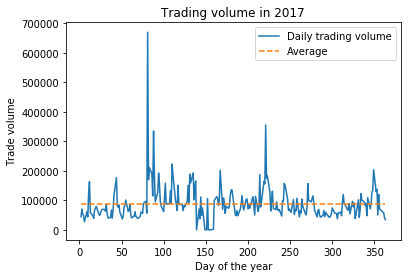

In [105]:
# create a plot with daily trading volume and average trading volume

# calculate the simple average of the data
y_mean = [average_daily_trade_volume]*len(days_year)

fig,ax = plt.subplots()

# plot the data
data_line = ax.plot(days_year, trade_volume, label='Daily trading volume')

# plot the average line
mean_line = ax.plot(days_year, y_mean, label='Average', linestyle='--')

# make a legend
legend = ax.legend(loc='upper right')

#give a name to the plot
plt.title('Trading volume in 2017')

# give names to both axis
plt.xlabel('Day of the year')
plt.ylabel('Trade volume')

plt.show()

In [106]:
# 7. (Optional) What was the median trading volume during this year. 
# (Note: you may need to implement your own function for calculating the median.)

def median_trade(list_values):
    n = len(list_values)
    if n < 1:
        return None
    if n % 2 == 1:
        return sorted(list_values)[n//2]
    else:
        return sum(sorted(list_values)[n//2-1: n//2+1])/2.0
print('The median trading volume during 2017 was',median_trade(trade_volume))

The median trading volume during 2017 was 76286.0
